I tried to plot something that would approximately represent the pattern traced by the top, the plots we have here do look similar to what we saw in the gyroscope lab


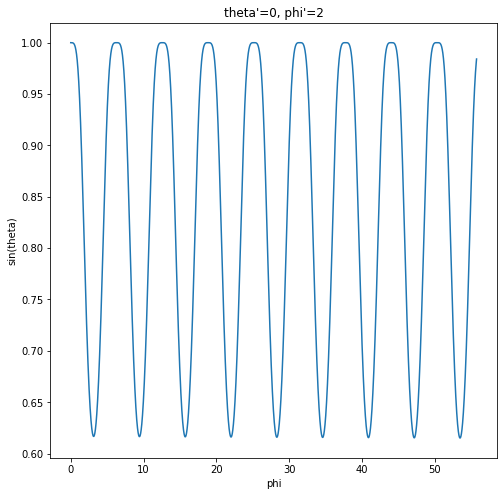

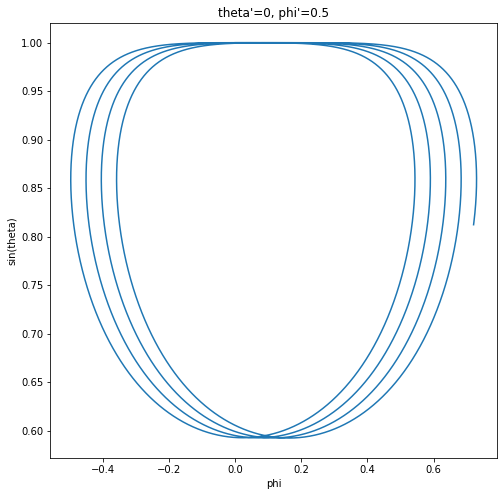

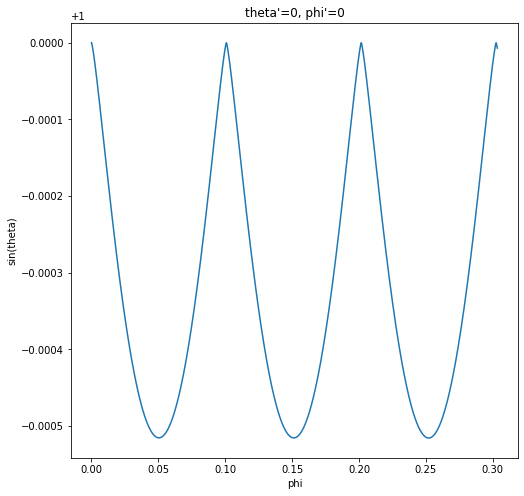

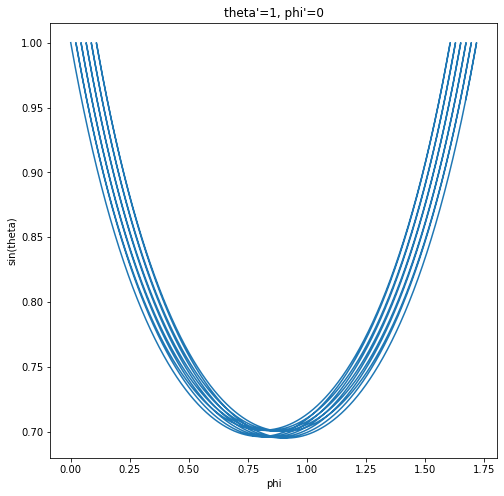

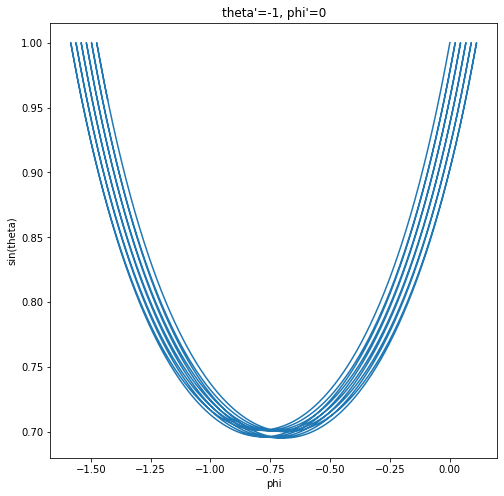

In [32]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import mpl_toolkits.mplot3d.axes3d as axes3d

#define constants
I3=0.0042
I12=0.0043
m=0.01
L=10*10**-2
g=9.81
def f(theta0,phi0,psi0,thetadot0,phidot0,psidot0):
    #initial conds
    theta=[theta0]
    phi=[phi0]
    psi=[psi0]
    thetadot=[thetadot0]
    phidot=[phidot0]
    psidot=[psidot0]
    
    #conserved momenta
    p_phi=(I12*np.sin(theta0)**2+I3*np.cos(theta0)**2)*phidot0+I3*np.cos(theta0)*psidot0
    p_psi=I3*(psidot0+phidot0*np.cos(theta0))
    
    #time evolution
    tstep=0.0001
    t=np.arange(0,25,tstep)
    for i in t:
        theta.append(theta[-1]+thetadot[-1]*tstep)
        phi.append(phi[-1]+((p_phi-p_psi*np.cos(theta[-1]))/(I12*np.sin(theta[-1])**2))*tstep)
        psi.append(psi[-1]+(p_psi/I3-(p_phi-p_psi*np.cos(theta[-1]))*np.cos(theta[-1])/(I12*np.sin(theta[-1])**2))*tstep)
        thetadot.append(thetadot[-1]+(phidot[-1]**2*np.sin(theta[-1])*np.cos(theta[-1])-I3/I12*np.sin(theta[-1])*phidot[-1]*(psidot[-1]+phidot[-1]*np.cos(theta[-1]))+m*g*L*np.sin(theta[-1]))*tstep)
        phidot.append(((p_phi-p_psi*np.cos(theta[-1]))/(I12*np.sin(theta[-1])**2)))
        psidot.append((p_psi/I3-(p_phi-p_psi*np.cos(theta[-1]))*np.cos(theta[-1])/(I12*np.sin(theta[-1])**2)))
    return (theta,phi,psi)

#case 1 thetadot=0, phidot>0
theta,phi,psi= f(np.pi/2,0,0,0,2,1)
figure(1,figsize=(8,8))
plt.plot(phi,np.sin(theta))
plt.title("theta'=0, phi'=2")
plt.xlabel('phi')
plt.ylabel('sin(theta)')

theta,phi,psi= f(np.pi/2,0,0,0,0.5,1)
figure(2,figsize=(8,8))
plt.plot(phi,np.sin(theta))
plt.title("theta'=0, phi'=0.5")
plt.xlabel('phi')
plt.ylabel('sin(theta)')

#case 2 thetadot=0 and phidot=0
theta,phi,psi= f(np.pi/2,0,0,0,0,0.8)
figure(3,figsize=(8,8))
plt.plot(phi,np.sin(theta))
plt.title("theta'=0, phi'=0")
plt.xlabel('phi')
plt.ylabel('sin(theta)')

#case 3 thetadot> 0 and phidot=0
theta,phi,psi= f(np.pi/2,0,0,1,0,1)
figure(4,figsize=(8,8))
plt.plot(phi,np.sin(theta))
plt.title("theta'=1, phi'=0")
plt.xlabel('phi')
plt.ylabel('sin(theta)')

#case 4 thetadot< 0 and phidot=0
theta,phi,psi= f(np.pi/2,0,0,-1,0,1)
figure(5,figsize=(8,8))
plt.plot(phi,np.sin(theta))
plt.title("theta'=-1, phi'=0")
plt.xlabel('phi')
plt.ylabel('sin(theta)')

print('I tried to plot something that would approximately represent the pattern traced by the top, the plots we have here \
do look similar to what we saw in the gyroscope lab')